## Compare total CO fluxes within IDL and Python masks.  
### See edge_compare_mom notebook for details.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from astropy.table import Table
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [2]:
def fluxplt(ax=None, line='co', file1='idl', file2='py', 
           col='Dilated', dolog=False, donames=False):   
    # --- Read the data
    data1 = Table.read('../smo7_idlmom/edge_smo7_coflux.csv', format='ascii.ecsv')
    data2 = Table.read('../smo7_mom_vrad/edge_coflux_smo7.csv', format='ascii.ecsv')
    # --- Get values and errors
    xdat = data1[line+col+'_smo7']
    xerr = data1[line+'e'+col+'_smo7']
    ydat = data2[line+col+'_smo7']
    yerr = data2[line+'e'+col+'_smo7']
    minval = np.nanmin(np.concatenate([xdat,ydat]))
    maxval = np.nanmax(np.concatenate([xdat,ydat]))
    minarr = np.minimum(xdat,ydat)
    nplot = np.count_nonzero(~np.isnan(minarr))
    # --- Make the plot
    ax.errorbar(xdat, ydat, xerr=xerr, yerr=yerr, 
        capsize=0, ls='none', color='blue', elinewidth=1)
    if donames == True:
        for xpos, ypos, name in zip(xdat, ydat, alldata['Name']):
            ax.annotate(name, (xpos,ypos), xytext=(-3,4), 
                        size='medium', textcoords='offset points',
                        horizontalalignment='right',zorder=3)
    ax.text(0.04,0.9,'N='+str(nplot),fontsize='large',ha='left',
            transform=ax.transAxes)
    ax.set_xlabel(col+' '+file1+' ['+str(xdat.unit)+']', labelpad=4, size='x-large')
    ax.set_ylabel(col+' '+file2+' ['+str(ydat.unit)+']', labelpad=3, size='x-large')
    ax.tick_params(axis='both', labelsize='large')
    if dolog == True:
        ax.set_xscale("log")
        ax.set_yscale("log")
    xmod = np.arange(minval,maxval)
    ax.plot(xmod,xmod,color='r')
    ax.set_aspect('equal')
    return

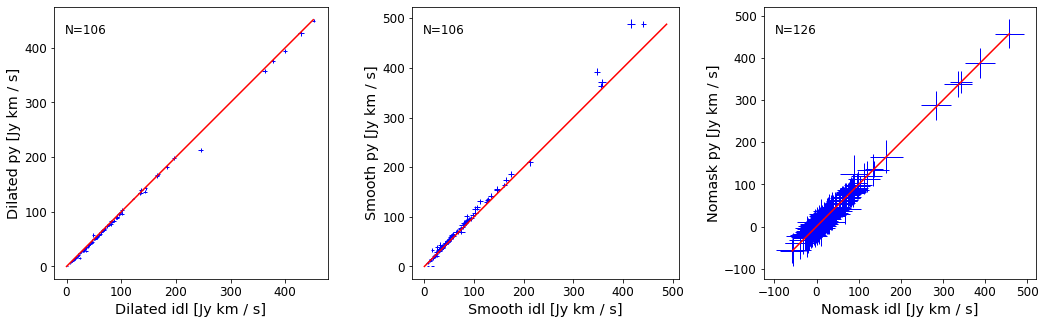

In [3]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))
fluxplt(ax=ax1, file1='idl', file2='py', col='Dilated', dolog=False)
fluxplt(ax=ax2, file1='idl', file2='py', col='Smooth', dolog=False)
fluxplt(ax=ax3, file1='idl', file2='py', col='Nomask', dolog=False)
plt.show()

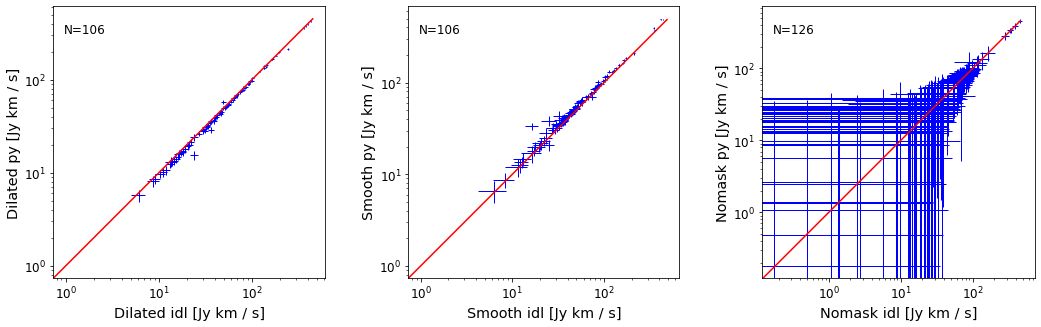

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))
fluxplt(ax=ax1, file1='idl', file2='py', col='Dilated', dolog=True)
fluxplt(ax=ax2, file1='idl', file2='py', col='Smooth', dolog=True)
fluxplt(ax=ax3, file1='idl', file2='py', col='Nomask', dolog=True)
plt.show()